In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

### The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [2]:
df = pd.read_csv('../data/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


### Explanatory Data Analysis (EDA)

<Figure size 1000x700 with 0 Axes>

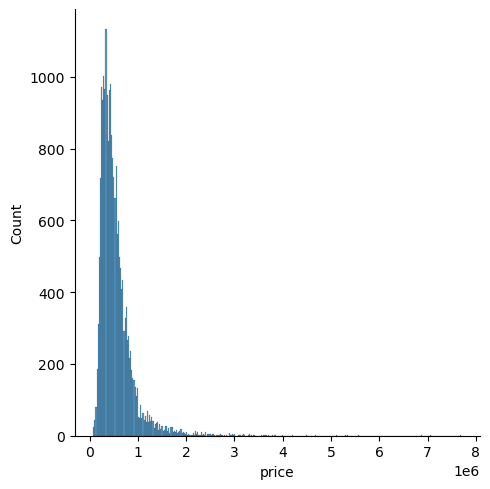

In [7]:
# checking the distribution of the target variable (price)

plt.figure(figsize=(10,7))
sns.displot(df['price']);

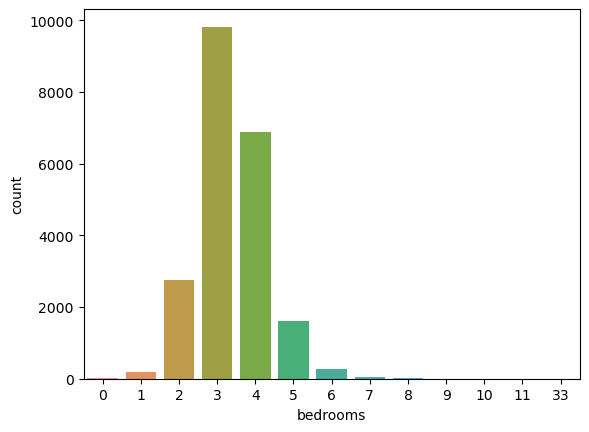

In [8]:
sns.countplot(data=df, x='bedrooms');

In [9]:
df.corr(numeric_only=True)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [10]:
df.corr(numeric_only=True)['price'].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

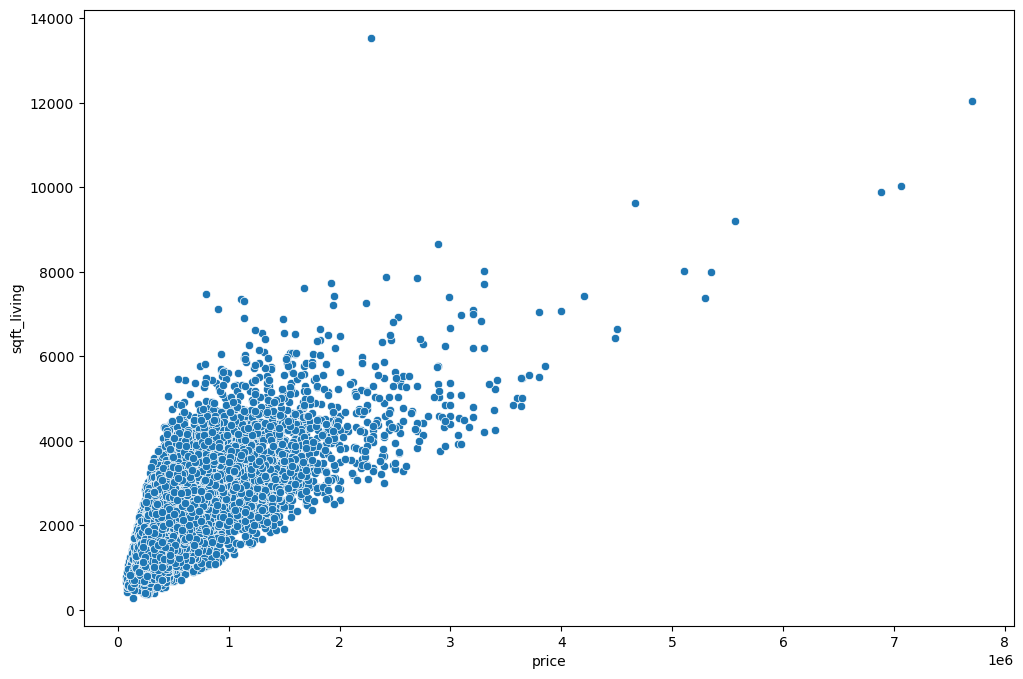

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df);

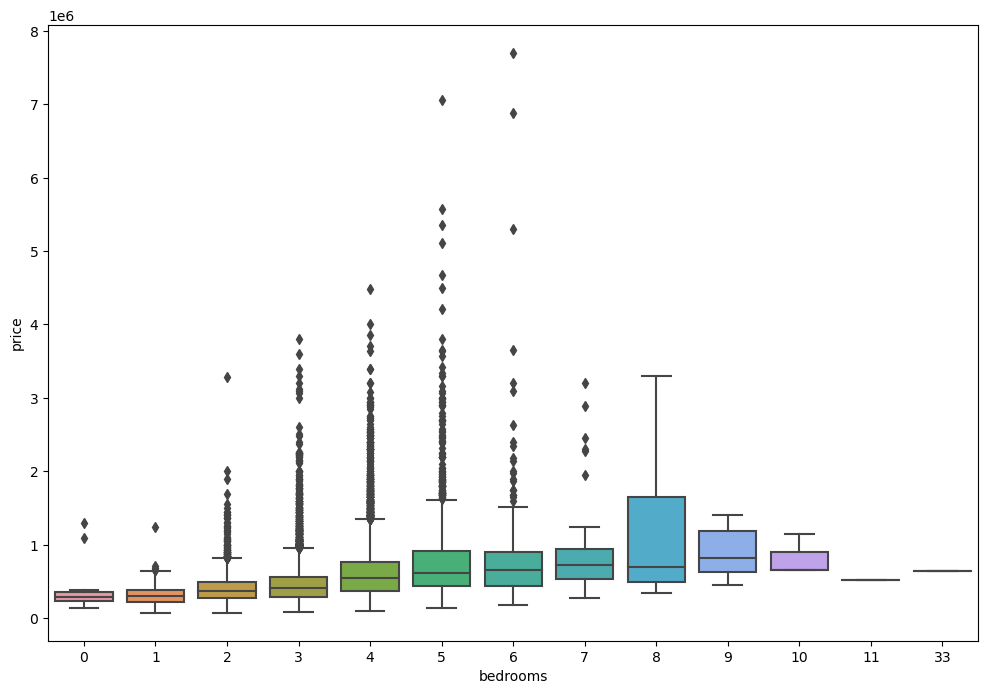

In [12]:
plt.figure(figsize=(12,8))
sns.boxplot(x='bedrooms',y='price',data=df);

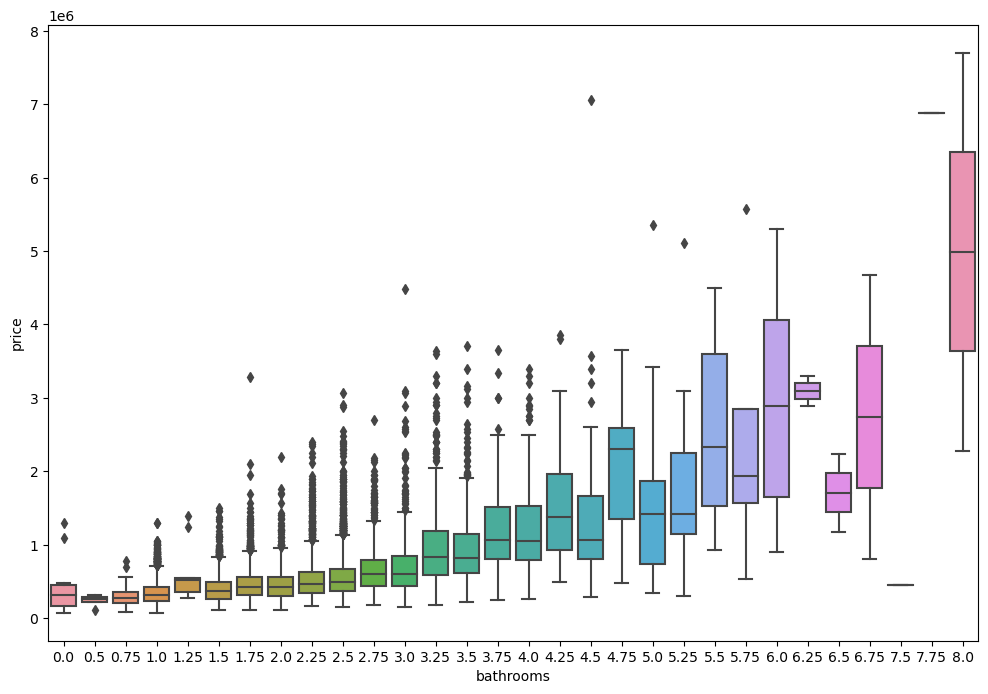

In [13]:
plt.figure(figsize=(12,8))
sns.boxplot(x='bathrooms',y='price',data=df);

In [14]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Geographical infromation from long and lat

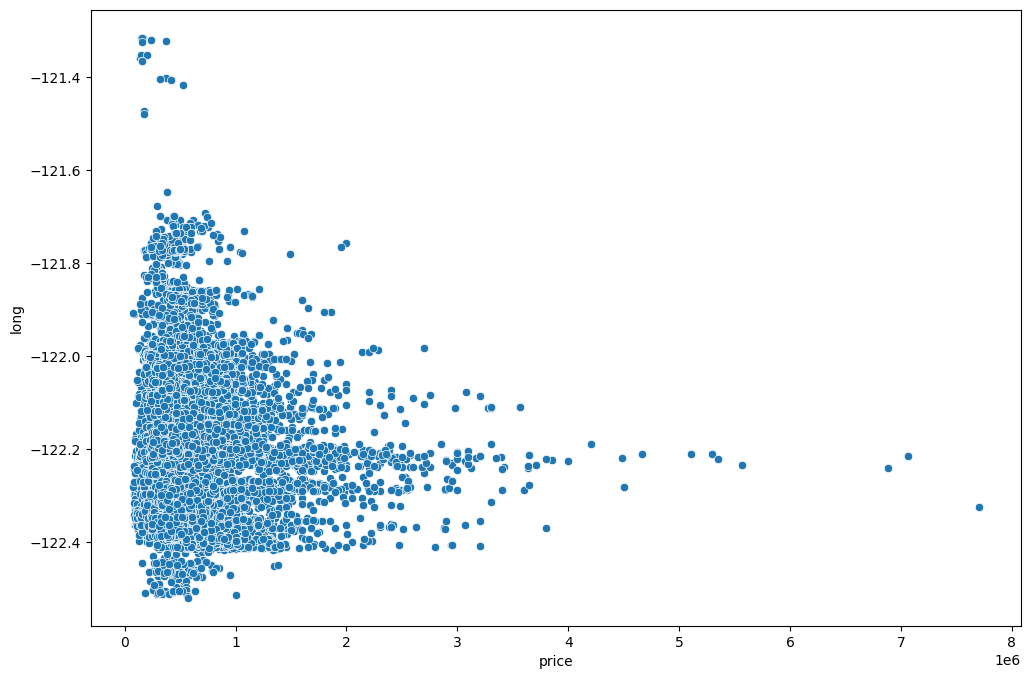

In [15]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df);

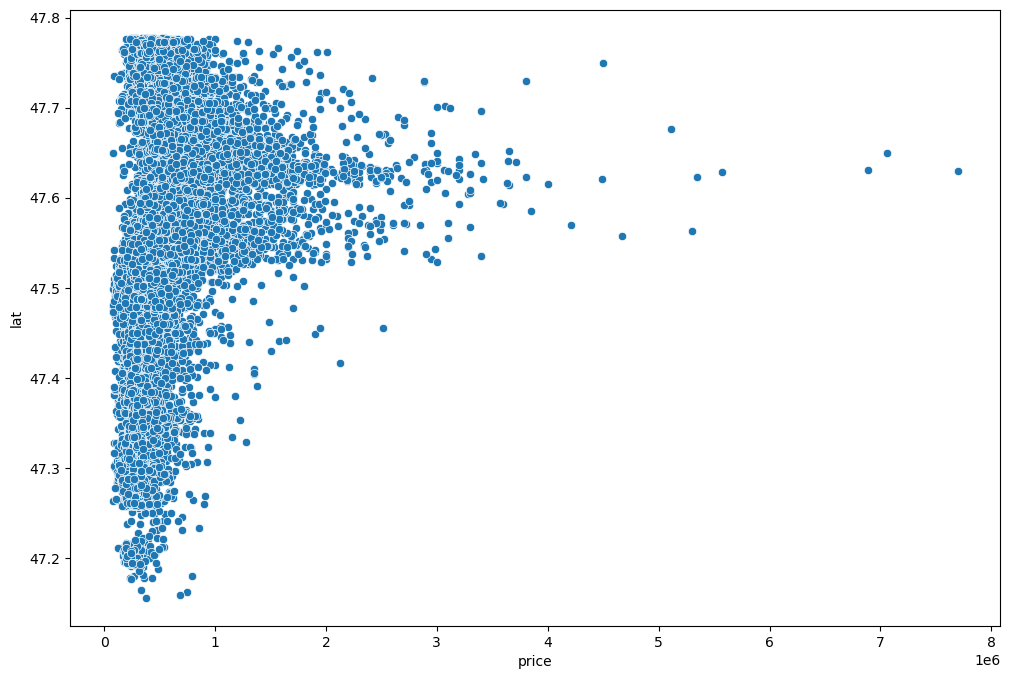

In [16]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df);

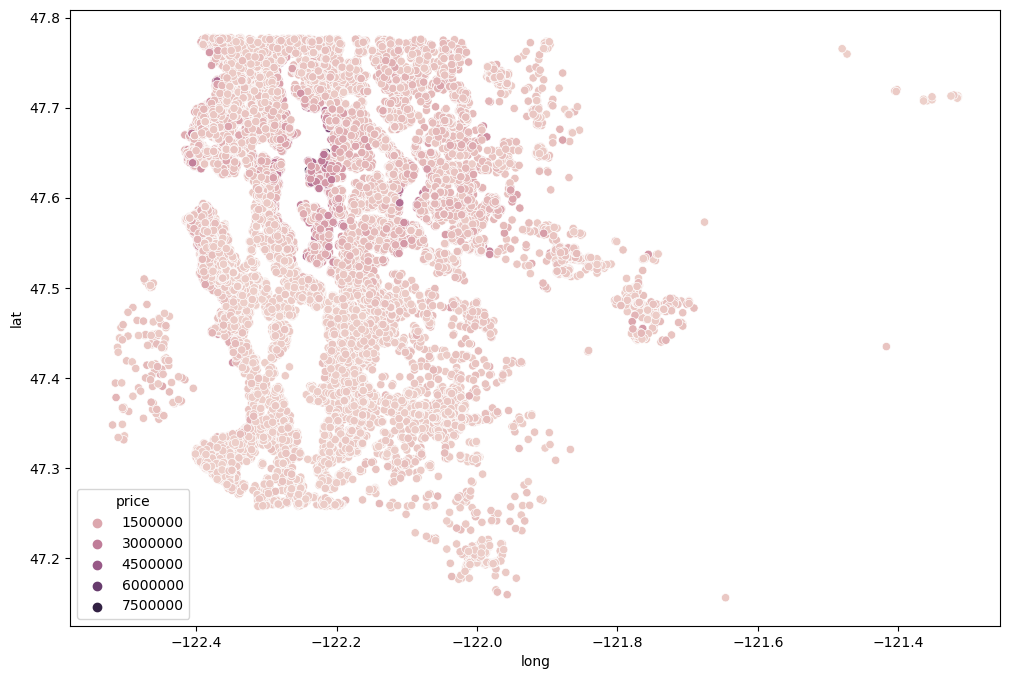

In [17]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price');

#### cleaning the dataset from expensive outliers (so that the map cleans up)

In [18]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2626,7738500731,20140815T000000,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8638,3835500195,20140618T000000,4489000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [19]:
len(df)

21613

In [20]:
len(df)*(0.01)

216.13

In [21]:
# removing the top 1% of the dataset for the really expensive houses after sorting values per price

df_non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

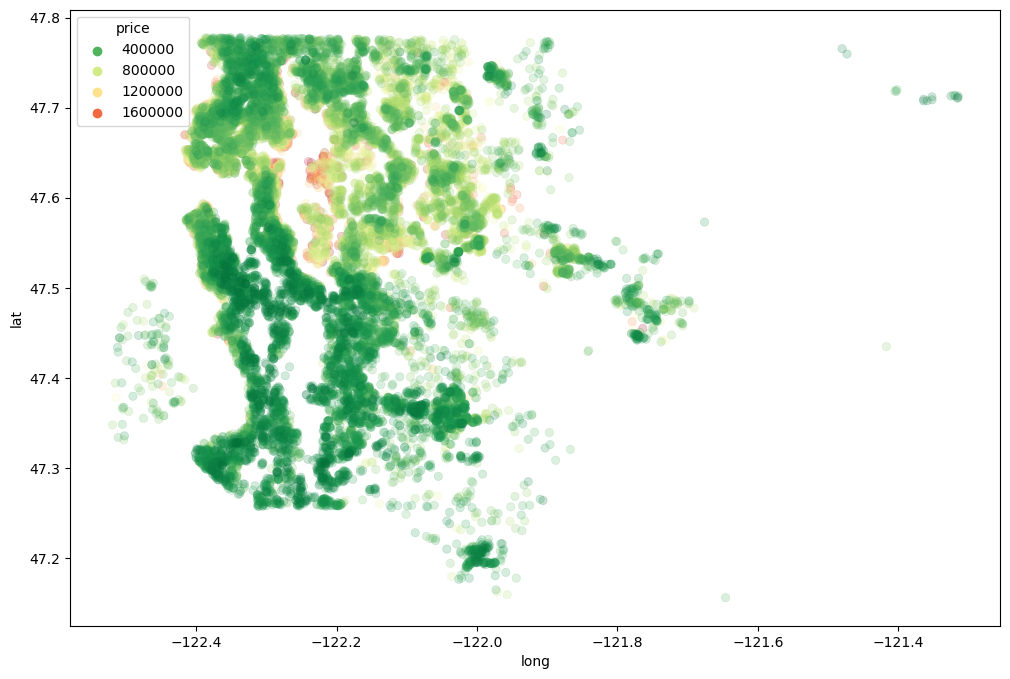

In [22]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=df_non_top_1_perc,hue='price',
                palette='RdYlGn_r', edgecolor=None, alpha=0.2);

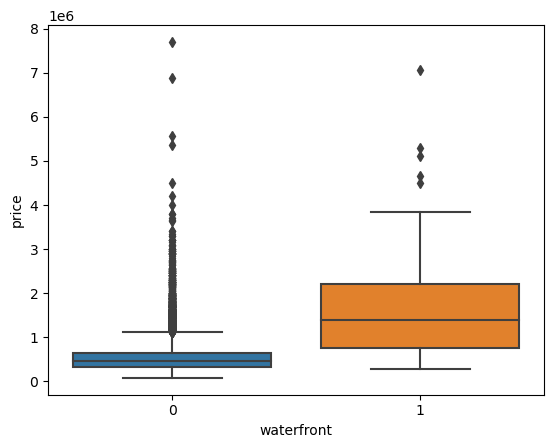

In [23]:
sns.boxplot(x='waterfront',y='price',data=df);

### Feature Engineering

In [24]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [25]:
df = df.drop('id',axis=1)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [27]:
# changing the dtype of the column 'date' to datetime object 

df['date'] = pd.to_datetime(df['date'])

In [28]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

In [29]:
df['month'] = df['date'].apply(lambda date:date.month)

In [30]:
df['year'] = df['date'].apply(lambda date:date.year)

In [31]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


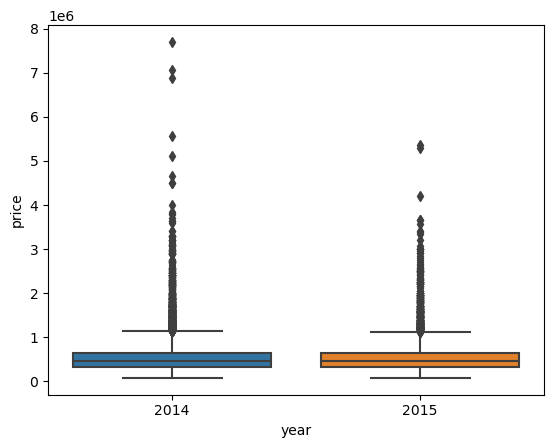

In [32]:
sns.boxplot(x='year',y='price',data=df);

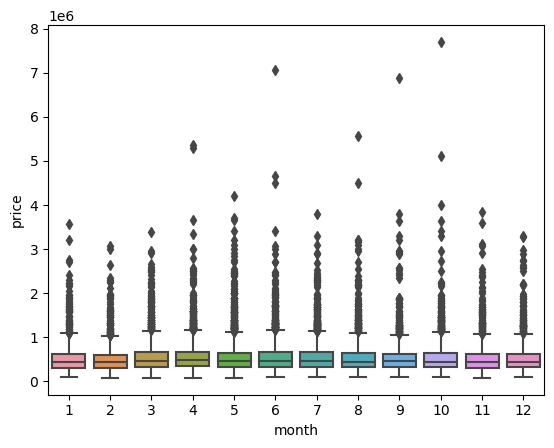

In [33]:
sns.boxplot(x='month',y='price',data=df);

In [34]:
df.groupby('month').mean(numeric_only=True)['price']

month
1     525870.889571
2     507851.371200
3     543977.187200
4     561837.774989
5     550768.785833
6     558002.199541
7     544788.764360
8     536445.276804
9     529253.821871
10    539026.971778
11    521961.009213
12    524461.866757
Name: price, dtype: float64

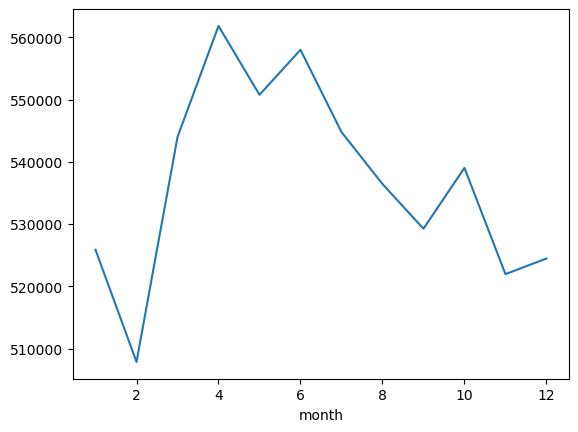

In [35]:
df.groupby('month').mean(numeric_only=True)['price'].plot();

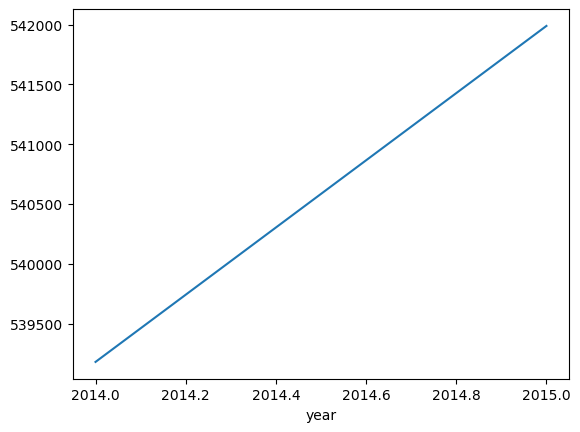

In [36]:
df.groupby('year').mean(numeric_only=True)['price'].plot();

In [37]:
df = df.drop('date',axis=1)

In [38]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [39]:
# May be worth considering to remove this or feature engineer categories from it
df['zipcode'].value_counts()


# there are 70 zipcodes so we should do 70 get dummies to make them categorical variable!

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [40]:
# decided to drop the zipcode column

df = df.drop('zipcode',axis=1)

In [41]:
# could make sense due to scaling, higher should correlate to more value
df['yr_renovated'].value_counts()

# so it is convenient in this example to keep it as continuous variable

0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [42]:
df['sqft_basement'].value_counts()

# same here, it is convenient in this example to keep it as continuous variable
# otherwise we should have to transform to categotical 

0      13126
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

### Train test split

In [43]:
X = df.drop('price',axis=1).values
y = df['price'].values

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

### Scaling the data

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
scaler = MinMaxScaler()

In [48]:
# fit the X_train to the scaler and transform it
X_train= scaler.fit_transform(X_train)

In [49]:
# only transfp
X_test = scaler.transform(X_test)

In [50]:
X_train.shape, X_test.shape

((15129, 19), (6484, 19))

### Creating a Sequential model with TensorFlow

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [52]:
# 1. creating the model
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

# 2. compiling the model
model.compile(optimizer='adam',loss='mse')

# 3. fitting the model
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,
          epochs=400)

Epoch 1/400
119/119 [==============================] - 2s 4ms/step - loss: 419692544000.0000 - val_loss: 442196918272.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 418566733824.0000 - val_loss: 438009364480.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 401258971136.0000 - val_loss: 396619710464.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 316490186752.0000 - val_loss: 257790279680.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 164595187712.0000 - val_loss: 123490877440.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 99929366528.0000 - val_loss: 107654168576.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 95679045632.0000 - val_loss: 105766805504.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 94138744832.0000 - val_loss: 104055480320.0000
Epoch 9/400
119/119

119/119 [==============================] - 0s 2ms/step - loss: 36569440256.0000 - val_loss: 41497427968.0000
Epoch 69/400
119/119 [==============================] - 0s 2ms/step - loss: 36362448896.0000 - val_loss: 41344516096.0000
Epoch 70/400
119/119 [==============================] - 0s 2ms/step - loss: 36206977024.0000 - val_loss: 41291698176.0000
Epoch 71/400
119/119 [==============================] - 0s 2ms/step - loss: 36036542464.0000 - val_loss: 41059979264.0000
Epoch 72/400
119/119 [==============================] - 0s 2ms/step - loss: 35922771968.0000 - val_loss: 40898789376.0000
Epoch 73/400
119/119 [==============================] - 0s 4ms/step - loss: 35724255232.0000 - val_loss: 40787312640.0000
Epoch 74/400
119/119 [==============================] - 0s 3ms/step - loss: 35653373952.0000 - val_loss: 40656879616.0000
Epoch 75/400
119/119 [==============================] - 0s 3ms/step - loss: 35501137920.0000 - val_loss: 40547999744.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 0s 2ms/step - loss: 31009210368.0000 - val_loss: 37102268416.0000
Epoch 136/400
119/119 [==============================] - 0s 2ms/step - loss: 30985152512.0000 - val_loss: 37082972160.0000
Epoch 137/400
119/119 [==============================] - 0s 2ms/step - loss: 30896738304.0000 - val_loss: 36988616704.0000
Epoch 138/400
119/119 [==============================] - 0s 2ms/step - loss: 30880780288.0000 - val_loss: 36950155264.0000
Epoch 139/400
119/119 [==============================] - 0s 2ms/step - loss: 30831882240.0000 - val_loss: 37008969728.0000
Epoch 140/400
119/119 [==============================] - 0s 2ms/step - loss: 30858534912.0000 - val_loss: 36957577216.0000
Epoch 141/400
119/119 [==============================] - 0s 2ms/step - loss: 30802536448.0000 - val_loss: 36897837056.0000
Epoch 142/400
119/119 [==============================] - 0s 2ms/step - loss: 30672717824.0000 - val_loss: 36852224000.0000
Epoch 143/400
11

119/119 [==============================] - 0s 2ms/step - loss: 29073920000.0000 - val_loss: 35569332224.0000
Epoch 202/400
119/119 [==============================] - 0s 2ms/step - loss: 29080145920.0000 - val_loss: 35556184064.0000
Epoch 203/400
119/119 [==============================] - 0s 2ms/step - loss: 29024098304.0000 - val_loss: 35587633152.0000
Epoch 204/400
119/119 [==============================] - 0s 2ms/step - loss: 29019162624.0000 - val_loss: 35491319808.0000
Epoch 205/400
119/119 [==============================] - 0s 2ms/step - loss: 29033564160.0000 - val_loss: 35475173376.0000
Epoch 206/400
119/119 [==============================] - 0s 2ms/step - loss: 28991713280.0000 - val_loss: 35494445056.0000
Epoch 207/400
119/119 [==============================] - 0s 2ms/step - loss: 28989937664.0000 - val_loss: 35459878912.0000
Epoch 208/400
119/119 [==============================] - 0s 2ms/step - loss: 28951349248.0000 - val_loss: 35427786752.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 28090746880.0000 - val_loss: 34533965824.0000
Epoch 268/400
119/119 [==============================] - 0s 2ms/step - loss: 28022218752.0000 - val_loss: 34468974592.0000
Epoch 269/400
119/119 [==============================] - 0s 2ms/step - loss: 27978985472.0000 - val_loss: 34473713664.0000
Epoch 270/400
119/119 [==============================] - 0s 2ms/step - loss: 27968729088.0000 - val_loss: 34478419968.0000
Epoch 271/400
119/119 [==============================] - 0s 2ms/step - loss: 27984771072.0000 - val_loss: 34387955712.0000
Epoch 272/400
119/119 [==============================] - 0s 2ms/step - loss: 27950589952.0000 - val_loss: 34494566400.0000
Epoch 273/400
119/119 [==============================] - 0s 2ms/step - loss: 27947008000.0000 - val_loss: 34397306880.0000
Epoch 274/400
119/119 [==============================] - 0s 2ms/step - loss: 27951833088.0000 - val_loss: 34426720256.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 27242778624.0000 - val_loss: 33581983744.0000
Epoch 334/400
119/119 [==============================] - 0s 2ms/step - loss: 27210954752.0000 - val_loss: 33778944000.0000
Epoch 335/400
119/119 [==============================] - 0s 2ms/step - loss: 27219034112.0000 - val_loss: 33637961728.0000
Epoch 336/400
119/119 [==============================] - 0s 2ms/step - loss: 27195031552.0000 - val_loss: 33666836480.0000
Epoch 337/400
119/119 [==============================] - 0s 2ms/step - loss: 27202359296.0000 - val_loss: 33543135232.0000
Epoch 338/400
119/119 [==============================] - 0s 2ms/step - loss: 27173289984.0000 - val_loss: 33565956096.0000
Epoch 339/400
119/119 [==============================] - 0s 2ms/step - loss: 27176364032.0000 - val_loss: 33529483264.0000
Epoch 340/400
119/119 [==============================] - 0s 2ms/step - loss: 27145476096.0000 - val_loss: 33498757120.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 26598387712.0000 - val_loss: 32800980992.0000
Epoch 400/400
119/119 [==============================] - 0s 2ms/step - loss: 26571597824.0000 - val_loss: 32792317952.0000


In [128]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 19)                380       
                                                                 
 dense_1 (Dense)             (None, 19)                380       
                                                                 
 dense_2 (Dense)             (None, 19)                380       
                                                                 
 dense_3 (Dense)             (None, 19)                380       
                                                                 
 dense_4 (Dense)             (None, 1)                 20        
                                                                 
Total params: 1540 (6.02 KB)
Trainable params: 1540 (6.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
losses = pd.DataFrame(model.history.history)

In [54]:
losses.head()

,loss,val_loss
0,4.196925e+11,4.421969e+11
1,4.185667e+11,4.380094e+11
2,4.012590e+11,3.966197e+11
3,3.164902e+11,2.577903e+11
4,1.645952e+11,1.234909e+11


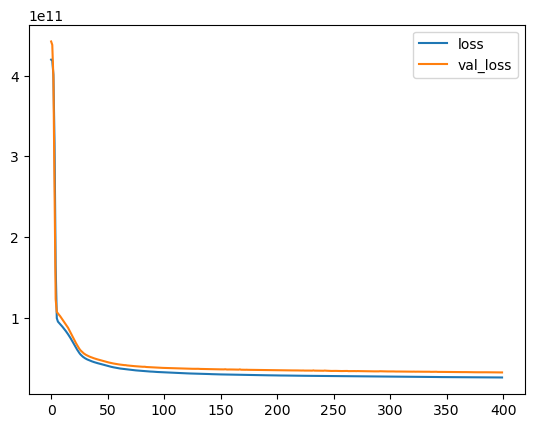

In [55]:
losses.plot();

### Evaluating the model on the test set

In [56]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [57]:
predictions = model.predict(X_test)

203/203 [==============================] - 0s 989us/step


In [58]:
mean_absolute_error(y_test,predictions)

107257.37633561941

In [59]:
np.sqrt(mean_squared_error(y_test,predictions))

181086.49449645443

In [60]:
explained_variance_score(y_test,predictions)

0.7728541419237175

In [61]:
df['price'].mean()

540088.1417665294

In [62]:
df['price'].median()

450000.0

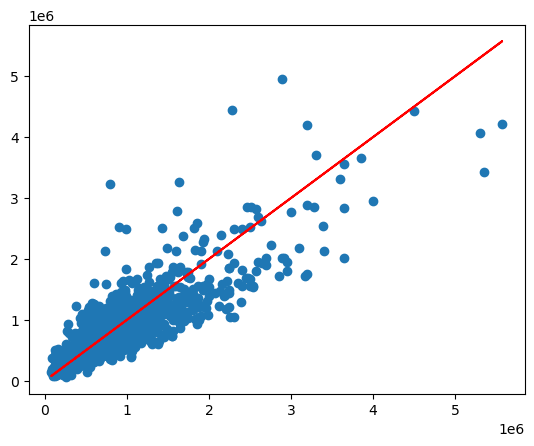

In [63]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r');

### Predicting a price of brand new house

In [66]:
single_house = df.drop('price',axis=1).iloc[0]

In [67]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [68]:
single_house

array([[0.09090909, 0.125     , 0.07568027, 0.00440618, 0.        ,
        0.        , 0.        , 0.5       , 0.5       , 0.10385064,
        0.        , 0.47826087, 0.        , 0.56914119, 0.21760797,
        0.16193426, 0.00574235, 0.81818182, 0.        ]])

In [69]:
model.predict(single_house)

1/1 [==============================] - 0s 20ms/step


array([[286306.62]], dtype=float32)

In [70]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014


In [71]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64

In [72]:
### Rebuilding the model on the bottom 99% of the dataframe, excluding high outliers

In [73]:
df_non_top_1_perc

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3281,8964800025,20150226T000000,1965000.0,5,3.75,3940,13738,1.5,0,3,...,9,3940,0,1951,0,98004,47.6203,-122.212,2370,13320
12577,2806300065,20150422T000000,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
12283,1923000260,20141015T000000,1959000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
1152,4055701200,20150421T000000,1955000.0,4,2.75,3120,7898,1.0,1,4,...,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868
9175,3124059023,20150213T000000,1955000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274,3883800011,20141105T000000,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16198,3028200080,20150324T000000,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
15293,40000362,20140506T000000,78000.0,2,1.00,780,16344,1.0,0,0,...,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387


In [74]:
df_non_top_1_perc = df_non_top_1_perc.drop('id',axis=1)

In [75]:
df_non_top_1_perc['date'] = pd.to_datetime(df_non_top_1_perc['date'])

In [76]:
df_non_top_1_perc['month'] = df_non_top_1_perc['date'].apply(lambda date:date.month)

In [77]:
df_non_top_1_perc['year'] = df_non_top_1_perc['date'].apply(lambda date:date.year)

In [78]:
df_non_top_1_perc.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
3281,2015-02-26,1965000.0,5,3.75,3940,13738,1.5,0,3,4,...,0,1951,0,98004,47.6203,-122.212,2370,13320,2,2015
12577,2015-04-22,1960000.0,4,4.00,4430,31353,2.0,0,0,3,...,0,1998,0,98005,47.6422,-122.157,3900,35237,4,2015
12283,2014-10-15,1959000.0,5,4.50,6200,23373,3.0,0,1,4,...,1150,1988,0,98040,47.5632,-122.215,3700,14486,10,2014
1152,2015-04-21,1955000.0,4,2.75,3120,7898,1.0,1,4,4,...,1560,1963,0,98034,47.7165,-122.259,2630,13868,4,2015
9175,2015-02-13,1955000.0,3,1.75,3330,12566,1.0,1,4,4,...,1390,1960,0,98040,47.5287,-122.220,3730,16560,2,2015


In [79]:
df_non_top_1_perc = df_non_top_1_perc.drop('date',axis=1)

In [80]:
X = df_non_top_1_perc.drop('price',axis=1).values
y = df_non_top_1_perc['price'].values

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [83]:
scaler = MinMaxScaler()

In [84]:
X_train = scaler.fit_transform(X_train)

In [85]:
X_test = scaler.transform(X_test)

In [86]:
X_train.shape, X_test.shape

((14977, 20), (6420, 20))

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [88]:
# model2 is identical to model1. Only that is trained on the 99% of the dataset (excluding very expensive outliers)

model2 = Sequential()

model2.add(Dense(19,activation='relu'))
model2.add(Dense(19,activation='relu'))
model2.add(Dense(19,activation='relu'))
model2.add(Dense(19,activation='relu'))
model2.add(Dense(1))

model2.compile(optimizer='adam',loss='mse')

In [89]:
model2.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

Epoch 1/400
118/118 [==============================] - 1s 3ms/step - loss: 349942022144.0000 - val_loss: 348655845376.0000
Epoch 2/400
118/118 [==============================] - 0s 2ms/step - loss: 348320006144.0000 - val_loss: 342760685568.0000
Epoch 3/400
118/118 [==============================] - 0s 2ms/step - loss: 324477681664.0000 - val_loss: 287644975104.0000
Epoch 4/400
118/118 [==============================] - 0s 2ms/step - loss: 218368458752.0000 - val_loss: 133878710272.0000
Epoch 5/400
118/118 [==============================] - 0s 2ms/step - loss: 83990077440.0000 - val_loss: 58024718336.0000
Epoch 6/400
118/118 [==============================] - 0s 2ms/step - loss: 57878003712.0000 - val_loss: 55968223232.0000
Epoch 7/400
118/118 [==============================] - 0s 2ms/step - loss: 56759808000.0000 - val_loss: 55000887296.0000
Epoch 8/400
118/118 [==============================] - 0s 2ms/step - loss: 55765536768.0000 - val_loss: 54034415616.0000
Epoch 9/400
118/118 [===

118/118 [==============================] - 0s 2ms/step - loss: 24285157376.0000 - val_loss: 23838060544.0000
Epoch 69/400
118/118 [==============================] - 0s 2ms/step - loss: 24220313600.0000 - val_loss: 23817158656.0000
Epoch 70/400
118/118 [==============================] - 0s 2ms/step - loss: 24210120704.0000 - val_loss: 23781797888.0000
Epoch 71/400
118/118 [==============================] - 0s 2ms/step - loss: 24150704128.0000 - val_loss: 23722246144.0000
Epoch 72/400
118/118 [==============================] - 0s 2ms/step - loss: 24106770432.0000 - val_loss: 23690719232.0000
Epoch 73/400
118/118 [==============================] - 0s 2ms/step - loss: 24078817280.0000 - val_loss: 23641239552.0000
Epoch 74/400
118/118 [==============================] - 0s 2ms/step - loss: 24004030464.0000 - val_loss: 23610077184.0000
Epoch 75/400
118/118 [==============================] - 0s 2ms/step - loss: 23965104128.0000 - val_loss: 23563251712.0000
Epoch 76/400
118/118 [===============

Epoch 135/400
118/118 [==============================] - 0s 2ms/step - loss: 22143473664.0000 - val_loss: 21752745984.0000
Epoch 136/400
118/118 [==============================] - 0s 2ms/step - loss: 22073169920.0000 - val_loss: 21739577344.0000
Epoch 137/400
118/118 [==============================] - 0s 2ms/step - loss: 22099746816.0000 - val_loss: 21731852288.0000
Epoch 138/400
118/118 [==============================] - 0s 2ms/step - loss: 22155163648.0000 - val_loss: 21808076800.0000
Epoch 139/400
118/118 [==============================] - 0s 2ms/step - loss: 22119884800.0000 - val_loss: 21692624896.0000
Epoch 140/400
118/118 [==============================] - 0s 2ms/step - loss: 22024237056.0000 - val_loss: 21745553408.0000
Epoch 141/400
118/118 [==============================] - 0s 2ms/step - loss: 22005690368.0000 - val_loss: 21648744448.0000
Epoch 142/400
118/118 [==============================] - 0s 2ms/step - loss: 21990621184.0000 - val_loss: 21629450240.0000
Epoch 143/400
11

118/118 [==============================] - 0s 2ms/step - loss: 21173327872.0000 - val_loss: 20792733696.0000
Epoch 202/400
118/118 [==============================] - 0s 2ms/step - loss: 21153337344.0000 - val_loss: 20773441536.0000
Epoch 203/400
118/118 [==============================] - 0s 2ms/step - loss: 21130645504.0000 - val_loss: 20821200896.0000
Epoch 204/400
118/118 [==============================] - 0s 2ms/step - loss: 21124263936.0000 - val_loss: 20747603968.0000
Epoch 205/400
118/118 [==============================] - 0s 2ms/step - loss: 21100470272.0000 - val_loss: 20761960448.0000
Epoch 206/400
118/118 [==============================] - 0s 2ms/step - loss: 21084989440.0000 - val_loss: 20731355136.0000
Epoch 207/400
118/118 [==============================] - 0s 2ms/step - loss: 21072029696.0000 - val_loss: 20720097280.0000
Epoch 208/400
118/118 [==============================] - 0s 2ms/step - loss: 21064243200.0000 - val_loss: 20757002240.0000
Epoch 209/400
118/118 [=======

118/118 [==============================] - 0s 2ms/step - loss: 20466020352.0000 - val_loss: 20207140864.0000
Epoch 268/400
118/118 [==============================] - 0s 2ms/step - loss: 20465393664.0000 - val_loss: 20148639744.0000
Epoch 269/400
118/118 [==============================] - 0s 2ms/step - loss: 20462708736.0000 - val_loss: 20194471936.0000
Epoch 270/400
118/118 [==============================] - 0s 2ms/step - loss: 20452315136.0000 - val_loss: 20095909888.0000
Epoch 271/400
118/118 [==============================] - 0s 2ms/step - loss: 20433811456.0000 - val_loss: 20096962560.0000
Epoch 272/400
118/118 [==============================] - 0s 2ms/step - loss: 20414228480.0000 - val_loss: 20097632256.0000
Epoch 273/400
118/118 [==============================] - 0s 2ms/step - loss: 20432238592.0000 - val_loss: 20184565760.0000
Epoch 274/400
118/118 [==============================] - 0s 2ms/step - loss: 20410716160.0000 - val_loss: 20057307136.0000
Epoch 275/400
118/118 [=======

118/118 [==============================] - 0s 2ms/step - loss: 19843323904.0000 - val_loss: 19570499584.0000
Epoch 334/400
118/118 [==============================] - 0s 2ms/step - loss: 19814987776.0000 - val_loss: 19500572672.0000
Epoch 335/400
118/118 [==============================] - 0s 2ms/step - loss: 19803291648.0000 - val_loss: 19491491840.0000
Epoch 336/400
118/118 [==============================] - 0s 2ms/step - loss: 19858612224.0000 - val_loss: 19464036352.0000
Epoch 337/400
118/118 [==============================] - 0s 2ms/step - loss: 19791882240.0000 - val_loss: 19456327680.0000
Epoch 338/400
118/118 [==============================] - 0s 2ms/step - loss: 19780438016.0000 - val_loss: 19447095296.0000
Epoch 339/400
118/118 [==============================] - 0s 2ms/step - loss: 19784423424.0000 - val_loss: 19440203776.0000
Epoch 340/400
118/118 [==============================] - 0s 2ms/step - loss: 19771756544.0000 - val_loss: 19462268928.0000
Epoch 341/400
118/118 [=======

118/118 [==============================] - 0s 2ms/step - loss: 19317819392.0000 - val_loss: 18980909056.0000
Epoch 400/400
118/118 [==============================] - 0s 2ms/step - loss: 19328030720.0000 - val_loss: 19046377472.0000


In [127]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 19)                399       
                                                                 
 dense_6 (Dense)             (None, 19)                380       
                                                                 
 dense_7 (Dense)             (None, 19)                380       
                                                                 
 dense_8 (Dense)             (None, 19)                380       
                                                                 
 dense_9 (Dense)             (None, 1)                 20        
                                                                 
Total params: 1559 (6.09 KB)
Trainable params: 1559 (6.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [92]:
losses2 = pd.DataFrame(model2.history.history)

In [93]:
losses2.head()

,loss,val_loss
0,3.499420e+11,3.486558e+11
1,3.483200e+11,3.427607e+11
2,3.244777e+11,2.876450e+11
3,2.183685e+11,1.338787e+11
4,8.399008e+10,5.802472e+10


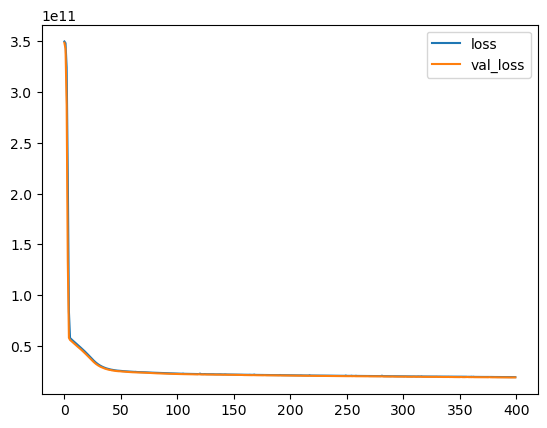

In [94]:
losses2.plot();

In [95]:
predictions2 = model2.predict(X_test)

201/201 [==============================] - 0s 1ms/step


In [96]:
mean_absolute_error(y_test,predictions2)

93659.79213517328

In [97]:
np.sqrt(mean_squared_error(y_test,predictions2))

138008.61961993005

In [98]:
explained_variance_score(y_test,predictions2)

0.7637664729576681

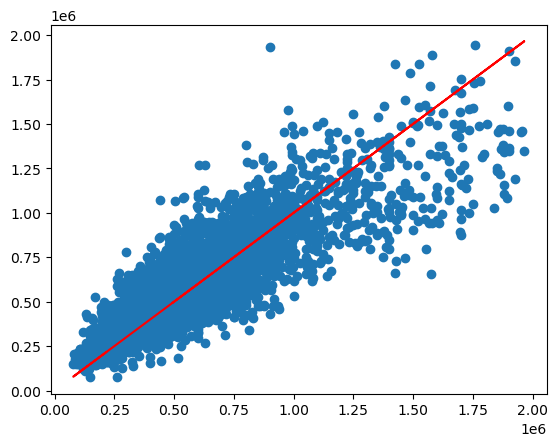

In [99]:
# Our predictions
plt.scatter(y_test,predictions2)

# Perfect predictions
plt.plot(y_test,y_test,'r');

In [100]:
# Removing the top 1% from the dataset was not very helpful to improve the model. 
# Let's try tweaking some of the model's hyperparameters 

In [101]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,5,2014
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,2,2015
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,6,2014
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,1,2015


In [102]:
X = df.drop('price',axis=1).values
y = df['price'].values

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [104]:
scaler = MinMaxScaler()

In [105]:
X_train= scaler.fit_transform(X_train)

In [106]:
X_test = scaler.transform(X_test)

In [107]:
X_train.shape, X_test.shape

((15129, 19), (6484, 19))

In [108]:
# model3 is improved in terms of more hidden units per layer 
# which gradually lead to 19 which is the number of features in the dataset

model3 = Sequential()

model3.add(Dense(152,activation='relu'))
model3.add(Dense(76,activation='relu'))
model3.add(Dense(38,activation='relu'))
model3.add(Dense(19,activation='relu'))
model3.add(Dense(1))

model3.compile(optimizer='adam',loss='mse')

In [109]:
model3.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 1s 4ms/step - loss: 419266985984.0000 - val_loss: 439280304128.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 381880401920.0000 - val_loss: 318432444416.0000
Epoch 3/400
119/119 [==============================] - 0s 3ms/step - loss: 166813286400.0000 - val_loss: 108778872832.0000
Epoch 4/400
119/119 [==============================] - 0s 3ms/step - loss: 95666298880.0000 - val_loss: 104839135232.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 92377317376.0000 - val_loss: 101440978944.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 89298034688.0000 - val_loss: 97595768832.0000
Epoch 7/400
119/119 [==============================] - 0s 3ms/step - loss: 85851463680.0000 - val_loss: 93631684608.0000
Epoch 8/400
119/119 [==============================] - 0s 3ms/step - loss: 82168127488.0000 - val_loss: 89199796224.0000
Epoch 9/400
119/119 [===

119/119 [==============================] - 0s 2ms/step - loss: 31234494464.0000 - val_loss: 37249912832.0000
Epoch 69/400
119/119 [==============================] - 0s 3ms/step - loss: 31231326208.0000 - val_loss: 37124665344.0000
Epoch 70/400
119/119 [==============================] - 0s 2ms/step - loss: 31031134208.0000 - val_loss: 37070057472.0000
Epoch 71/400
119/119 [==============================] - 0s 2ms/step - loss: 31007287296.0000 - val_loss: 37005553664.0000
Epoch 72/400
119/119 [==============================] - 0s 3ms/step - loss: 30888792064.0000 - val_loss: 36960075776.0000
Epoch 73/400
119/119 [==============================] - 0s 3ms/step - loss: 30834724864.0000 - val_loss: 36876034048.0000
Epoch 74/400
119/119 [==============================] - 0s 3ms/step - loss: 30734174208.0000 - val_loss: 36856717312.0000
Epoch 75/400
119/119 [==============================] - 0s 3ms/step - loss: 30645909504.0000 - val_loss: 36906905600.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 0s 3ms/step - loss: 28141045760.0000 - val_loss: 34196445184.0000
Epoch 136/400
119/119 [==============================] - 0s 2ms/step - loss: 28120834048.0000 - val_loss: 34061068288.0000
Epoch 137/400
119/119 [==============================] - 0s 3ms/step - loss: 28030967808.0000 - val_loss: 34043258880.0000
Epoch 138/400
119/119 [==============================] - 0s 2ms/step - loss: 28029546496.0000 - val_loss: 33976782848.0000
Epoch 139/400
119/119 [==============================] - 0s 2ms/step - loss: 28005603328.0000 - val_loss: 34108010496.0000
Epoch 140/400
119/119 [==============================] - 0s 3ms/step - loss: 27925979136.0000 - val_loss: 34215065600.0000
Epoch 141/400
119/119 [==============================] - 0s 2ms/step - loss: 28051699712.0000 - val_loss: 34253150208.0000
Epoch 142/400
119/119 [==============================] - 0s 2ms/step - loss: 27921999872.0000 - val_loss: 33891407872.0000
Epoch 143/400
11

119/119 [==============================] - 0s 3ms/step - loss: 26207954944.0000 - val_loss: 32028430336.0000
Epoch 202/400
119/119 [==============================] - 0s 4ms/step - loss: 26293923840.0000 - val_loss: 32030300160.0000
Epoch 203/400
119/119 [==============================] - 0s 3ms/step - loss: 26254735360.0000 - val_loss: 32196009984.0000
Epoch 204/400
119/119 [==============================] - 0s 3ms/step - loss: 26180765696.0000 - val_loss: 31766695936.0000
Epoch 205/400
119/119 [==============================] - 0s 3ms/step - loss: 26141302784.0000 - val_loss: 31971989504.0000
Epoch 206/400
119/119 [==============================] - 0s 3ms/step - loss: 26152306688.0000 - val_loss: 31788623872.0000
Epoch 207/400
119/119 [==============================] - 0s 3ms/step - loss: 26048815104.0000 - val_loss: 31847606272.0000
Epoch 208/400
119/119 [==============================] - 0s 3ms/step - loss: 26083778560.0000 - val_loss: 31829393408.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 3ms/step - loss: 23244836864.0000 - val_loss: 28868700160.0000
Epoch 268/400
119/119 [==============================] - 0s 3ms/step - loss: 23084849152.0000 - val_loss: 28726030336.0000
Epoch 269/400
119/119 [==============================] - 0s 2ms/step - loss: 23133202432.0000 - val_loss: 28558200832.0000
Epoch 270/400
119/119 [==============================] - 0s 2ms/step - loss: 22985787392.0000 - val_loss: 28466900992.0000
Epoch 271/400
119/119 [==============================] - 0s 2ms/step - loss: 22984456192.0000 - val_loss: 28493103104.0000
Epoch 272/400
119/119 [==============================] - 0s 2ms/step - loss: 22848940032.0000 - val_loss: 28247459840.0000
Epoch 273/400
119/119 [==============================] - 0s 2ms/step - loss: 22773866496.0000 - val_loss: 28623777792.0000
Epoch 274/400
119/119 [==============================] - 0s 2ms/step - loss: 22680375296.0000 - val_loss: 28082771968.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 3ms/step - loss: 18086926336.0000 - val_loss: 22618060800.0000
Epoch 334/400
119/119 [==============================] - 0s 3ms/step - loss: 18014304256.0000 - val_loss: 22814056448.0000
Epoch 335/400
119/119 [==============================] - 0s 3ms/step - loss: 18045325312.0000 - val_loss: 22557624320.0000
Epoch 336/400
119/119 [==============================] - 0s 3ms/step - loss: 17917126656.0000 - val_loss: 22445850624.0000
Epoch 337/400
119/119 [==============================] - 0s 3ms/step - loss: 17877415936.0000 - val_loss: 22695841792.0000
Epoch 338/400
119/119 [==============================] - 0s 2ms/step - loss: 17923659776.0000 - val_loss: 22513043456.0000
Epoch 339/400
119/119 [==============================] - 0s 2ms/step - loss: 17792747520.0000 - val_loss: 22427729920.0000
Epoch 340/400
119/119 [==============================] - 0s 3ms/step - loss: 17654388736.0000 - val_loss: 22189508608.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 0s 3ms/step - loss: 15275812864.0000 - val_loss: 20073406464.0000
Epoch 400/400
119/119 [==============================] - 0s 2ms/step - loss: 15183881216.0000 - val_loss: 20144517120.0000


In [126]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 152)               3040      
                                                                 
 dense_11 (Dense)            (None, 76)                11628     
                                                                 
 dense_12 (Dense)            (None, 38)                2926      
                                                                 
 dense_13 (Dense)            (None, 19)                741       
                                                                 
 dense_14 (Dense)            (None, 1)                 20        
                                                                 
Total params: 18355 (71.70 KB)
Trainable params: 18355 (71.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [110]:
losses3 = pd.DataFrame(model3.history.history)

In [111]:
losses3.head()

,loss,val_loss
0,4.192670e+11,4.392803e+11
1,3.818804e+11,3.184324e+11
2,1.668133e+11,1.087789e+11
3,9.566630e+10,1.048391e+11
4,9.237732e+10,1.014410e+11


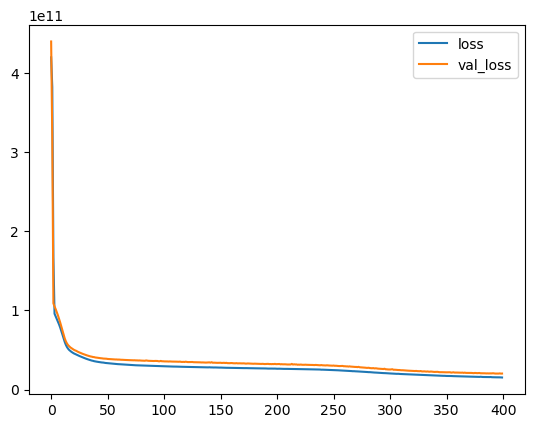

In [112]:
losses3.plot();

In [113]:
predictions3 = model3.predict(X_test)

203/203 [==============================] - 0s 938us/step


In [114]:
mean_absolute_error(y_test,predictions3)

80332.68815204143

In [115]:
np.sqrt(mean_squared_error(y_test,predictions3))

141931.36323667143

In [116]:
explained_variance_score(y_test,predictions3)

0.8607486080541441

In [ ]:
# model3 has been significantly improved!

In [117]:
df['price'].mean()

540088.1417665294

In [118]:
single_house2 = df.drop('price',axis=1).iloc[1]

In [120]:
single_house2 = scaler.transform(single_house2.values.reshape(-1, 19))

In [121]:
single_house2

array([[0.09090909, 0.28125   , 0.19387755, 0.00577356, 0.4       ,
        0.        , 0.        , 0.5       , 0.5       , 0.21936989,
        0.08298755, 0.44347826, 0.98808933, 0.90845868, 0.16611296,
        0.22216486, 0.00802712, 1.        , 0.        ]])

In [122]:
model.predict(single_house2)

1/1 [==============================] - 0s 22ms/step


array([[609319.75]], dtype=float32)

In [124]:
df.iloc[1]

price            538000.000
bedrooms              3.000
bathrooms             2.250
sqft_living        2570.000
sqft_lot           7242.000
floors                2.000
waterfront            0.000
view                  0.000
condition             3.000
grade                 7.000
sqft_above         2170.000
sqft_basement       400.000
yr_built           1951.000
yr_renovated       1991.000
lat                  47.721
long               -122.319
sqft_living15      1690.000
sqft_lot15         7639.000
month                12.000
year               2014.000
Name: 1, dtype: float64

### Saving the model

In [125]:
from tensorflow.keras.models import load_model

In [129]:
model3.save("../models/best_of_three_models.H5")

INFO:tensorflow:Assets written to: ../models/best_of_three_models.H5\assets


INFO:tensorflow:Assets written to: ../models/best_of_three_models.H5\assets


### Re-loading the saved model and evaluating whether it was saved correctly

In [130]:
saved_model = load_model("../models/best_of_three_models.H5")

In [131]:
saved_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 152)               3040      
                                                                 
 dense_11 (Dense)            (None, 76)                11628     
                                                                 
 dense_12 (Dense)            (None, 38)                2926      
                                                                 
 dense_13 (Dense)            (None, 19)                741       
                                                                 
 dense_14 (Dense)            (None, 1)                 20        
                                                                 
Total params: 18355 (71.70 KB)
Trainable params: 18355 (71.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [132]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 152)               3040      
                                                                 
 dense_11 (Dense)            (None, 76)                11628     
                                                                 
 dense_12 (Dense)            (None, 38)                2926      
                                                                 
 dense_13 (Dense)            (None, 19)                741       
                                                                 
 dense_14 (Dense)            (None, 1)                 20        
                                                                 
Total params: 18355 (71.70 KB)
Trainable params: 18355 (71.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [134]:
# Compare model_3 predictions with saved_model predictions

model3_preds = model3.predict(X_test)
saved_model_preds = saved_model.predict(X_test)

model3_preds == saved_model_preds

203/203 [==============================] - 0s 1ms/step


array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
# this project was part of the course 'Python for Data Science and Machine Learning Bootcamp' from Udemy instructed by Jose Portilla and Pierian Data